# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules.

### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

[Write your response here. Double-click (or enter) to edit.]

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

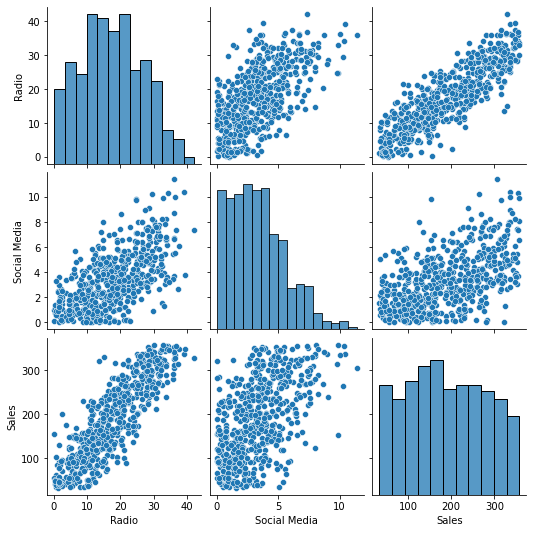

In [3]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(data)

**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



ZY: Radio has a linear relationship with sales.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [4]:
# Calculate the mean sales for each TV category. 
### YOUR CODE HERE ### 
TV_mean = data.groupby('TV')['Sales'].mean()

# Calculate the mean sales for each Influencer category. 
### YOUR CODE HERE ### 
influencer_mean = data.groupby('Influencer')['Sales'].mean()

# Print results
print(TV_mean)
print(influencer_mean)

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



ZY: Categorically, TV has a increasign trend of mean sales from low to high. This variable could be a useful predictor of sales. On the contract, since influencer mean sales are roughly similar, this could mean that Influencer categories doesn't affect mean sales value as much.

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [5]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data = data.dropna()

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [6]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ### 
data.columns = ['tv','radio','social_media','influencer','sales']

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [7]:
# Define the OLS formula.

### YOUR CODE HERE ### 
ols_formula = 'sales ~ radio + C(tv)'

# Create an OLS model.

### YOUR CODE HERE ### 
OLS = ols(formula=ols_formula,data=data[['sales','radio','tv']])

# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
model_results = model.summary()

# Display the model results.

### YOUR CODE HERE ### 
print(model_results)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          1.63e-288
Time:                        09:24:05   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     

**Question:** Which independent variables did you choose for the model, and why?



ZY: I chose radio due to its strong linearity when observing it visually from the pairplot. Additionally, I also chose TV due to its strong trend when ordering the categorical variables

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   tv            572 non-null    category
 1   radio         572 non-null    float64 
 2   social_media  572 non-null    float64 
 3   influencer    572 non-null    object  
 4   sales         572 non-null    float64 
dtypes: category(1), float64(3), object(1)
memory usage: 23.0+ KB


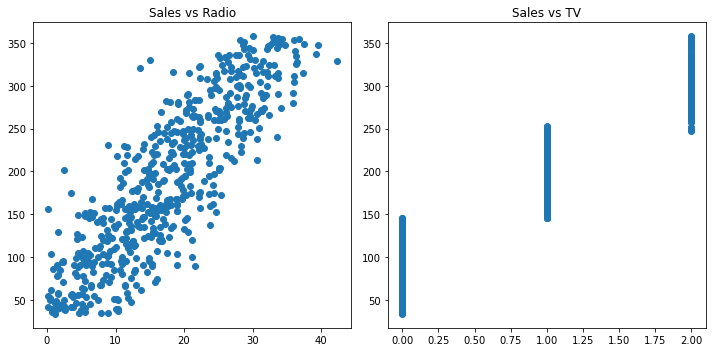

In [8]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(x=data['radio'],y=data['sales'])
ax[0].set_title('Sales vs Radio')

# Convert tv into a categorical so that I can sort it
tv_type = pd.CategoricalDtype(categories=['Low','Medium','High'],ordered=True)
data['tv']=data['tv'].astype(tv_type)
data.info()
ax[1].scatter(x=data['tv'].cat.codes,y=data['sales'])
ax[1].set_title('Sales vs TV')
plt.tight_layout()
plt.show()

**Question:** Is the linearity assumption met?


ZY: Yes. Looks linear.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

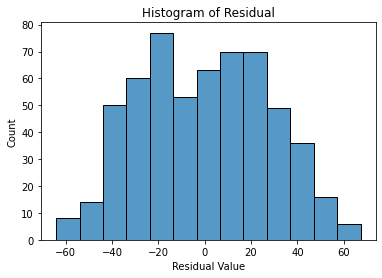

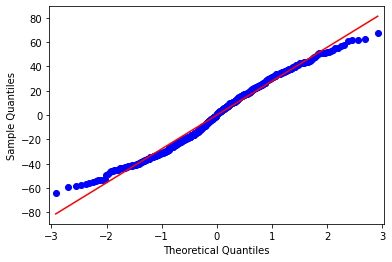

In [9]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = model.resid

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of Residual')
plt.show()

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 
fig = sm.qqplot(residuals, line='s')
plt.show()

**Question:** Is the normality assumption met?



ZY: The residuals roughly follow a normal distribution + diagonal line.

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

<function matplotlib.pyplot.show(*args, **kw)>

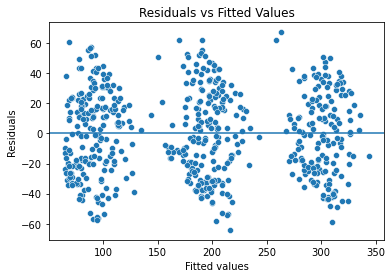

In [10]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
x = data[['tv','radio']]
fitted_values = model.predict(x)
fig = sns.scatterplot(x=fitted_values,y=residuals)
fig.set_xlabel('Fitted values')
fig.set_ylabel('Residuals')
fig.set_title('Residuals vs Fitted Values')
fig.axhline(0)
plt.show

**Question:** Is the constant variance assumption met?




ZY: The data is grouped up into three bunch because of the categorical encoding. Otherwise, the variance is actually okay, theres no cone shape or linear pattern in the residuals.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

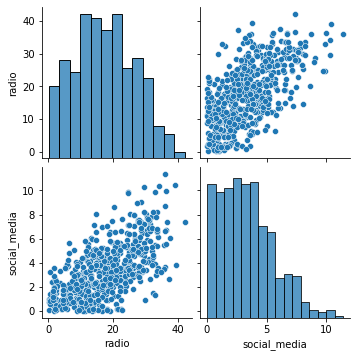

In [11]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(data=data.drop('sales',axis='columns'))

In [12]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['radio','social_media']]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif = zip(X,vif)
print(list(vif))

[('radio', 5.170921621625241), ('social_media', 5.170921621625241)]


**Question 8:** Is the no multicollinearity assumption met?

ZY: It does seem like radio and social media is slightly positively linearly connected.

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [13]:
# Display the model results summary.

### YOUR CODE HERE ### 
print(model_results)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          1.63e-288
Time:                        09:24:05   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     

**Question:** What is your interpretation of the model's R-squared?


ZY: Both TV and radio explains about 90.4% of the variance in the predicted results.

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [14]:
# Display the model results summary.

### YOUR CODE HERE ### 
print(model_results)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          1.63e-288
Time:                        09:24:05   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     

**Question:** What are the model coefficients?



ZY: 
* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$
$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



ZY: The coefficients show negative signs, meaning that when radio is kept constant, Low and Medium TV categories are lower than High TV categories. Furthermore, the p-values for the coefficient signals that the coefficient are significant, meaning that $\beta_{}$ != 0.

**Question:** Why is it important to interpret the beta coefficients?



ZY: Beta coeffieicents estimate magnitude and direction of each independent variable on the dependent variable.

**Question:** What are you interested in exploring based on your model?



ZY: Estimated sales given different combinations of data.

**Question:** Do you think your model could be improved? Why or why not? How?

ZY: Breaking down features by adding more information like budgets can increase model accuracy.

## Conclusion

**What are the key takeaways from this lab?**

Don't need to worry about whether categorical type will be encoded properly. When feeding into OLS, does it automatically. Just have to worry about how to present this data.

**What results can be presented from this lab?**

TV and Radio significantly affect Sales.

**How would you frame your findings to external stakeholders?**

Focus more budget to TV and radio prootions to increae sales.

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.